<a href="https://colab.research.google.com/github/lucywowen/csci191_ProgSci/blob/main/workshops/visualizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing data

The mathematician Richard Hamming once said, “The purpose of computing is insight, not numbers,” and the best way to develop insight is often to visualize data. Visualization deserves an entire lecture of its own, but we can explore a few features of Python’s `matplotlib` library here. While there is no official plotting library, `matplotlib` is the de facto standard. First, we will `import` the `pyplot` module from `matplotlib` and use two of its functions to create and display a heat map of our data.

First let's reload the data into colab and our NumPy dependency.

In [ ]:
import numpy

In [ ]:
from google.colab import files
files.upload()

Saving inflammation-01.csv to inflammation-01.csv


{'inflammation-01.csv': b'0,0,1,3,1,2,4,7,8,3,3,3,10,5,7,4,7,7,12,18,6,13,11,11,7,7,4,6,8,8,4,4,5,7,3,4,2,3,0,0\n0,1,2,1,2,1,3,2,2,6,10,11,5,9,4,4,7,16,8,6,18,4,12,5,12,7,11,5,11,3,3,5,4,4,5,5,1,1,0,1\n0,1,1,3,3,2,6,2,5,9,5,7,4,5,4,15,5,11,9,10,19,14,12,17,7,12,11,7,4,2,10,5,4,2,2,3,2,2,1,1\n0,0,2,0,4,2,2,1,6,7,10,7,9,13,8,8,15,10,10,7,17,4,4,7,6,15,6,4,9,11,3,5,6,3,3,4,2,3,2,1\n0,1,1,3,3,1,3,5,2,4,4,7,6,5,3,10,8,10,6,17,9,14,9,7,13,9,12,6,7,7,9,6,3,2,2,4,2,0,1,1\n0,0,1,2,2,4,2,1,6,4,7,6,6,9,9,15,4,16,18,12,12,5,18,9,5,3,10,3,12,7,8,4,7,3,5,4,4,3,2,1\n0,0,2,2,4,2,2,5,5,8,6,5,11,9,4,13,5,12,10,6,9,17,15,8,9,3,13,7,8,2,8,8,4,2,3,5,4,1,1,1\n0,0,1,2,3,1,2,3,5,3,7,8,8,5,10,9,15,11,18,19,20,8,5,13,15,10,6,10,6,7,4,9,3,5,2,5,3,2,2,1\n0,0,0,3,1,5,6,5,5,8,2,4,11,12,10,11,9,10,17,11,6,16,12,6,8,14,6,13,10,11,4,6,4,7,6,3,2,1,0,0\n0,1,1,2,1,3,5,3,5,8,6,8,12,5,13,6,13,8,16,8,18,15,16,14,12,7,3,8,9,11,2,5,4,5,1,4,1,2,0,0\n0,1,0,0,4,3,3,5,5,4,5,8,7,10,13,3,7,13,15,18,8,15,15,16,11,14,12,4,10,10,4,3,4

And then load our data in from the csv file to an array.  

In [ ]:
data = numpy.loadtxt(fname='inflammation-01.csv', delimiter=',')

Now let's plot it!

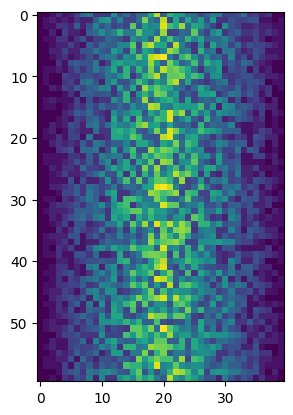

In [ ]:
import matplotlib.pyplot
image = matplotlib.pyplot.imshow(data)
matplotlib.pyplot.show()


Each row in the heat map corresponds to a patient in the clinical trial dataset, and each column corresponds to a day in the dataset. Blue pixels in this heat map represent low values, while yellow pixels represent high values. As we can see, the general number of inflammation flare-ups for the patients rises and falls over a 40-day period.

So far so good as this is in line with our knowledge of the clinical trial and Dr. Maverick’s claims:

- the patients take their medication once their inflammation flare-ups begin
- it takes around 3 weeks for the medication to take effect and begin reducing flare-ups
- and flare-ups appear to drop to zero by the end of the clinical trial.

Now let’s take a look at the average inflammation over time:

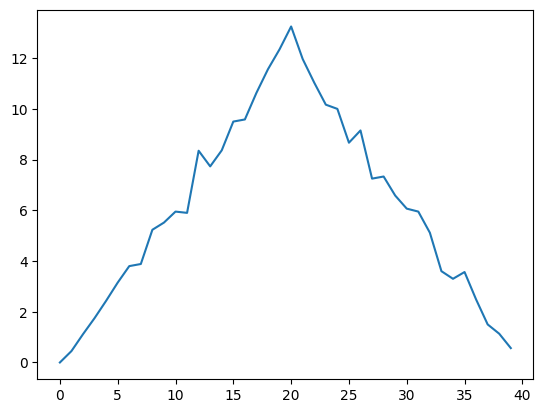

In [ ]:
ave_inflammation = numpy.mean(data, axis=0)
ave_plot = matplotlib.pyplot.plot(ave_inflammation)
matplotlib.pyplot.show()

Here, we have put the average inflammation per day across all patients in the variable `ave_inflammation`, then asked `matplotlib.pyplot` to create and display a line graph of those values. The result is a reasonably linear rise and fall, in line with Dr. Maverick’s claim that the medication takes 3 weeks to take effect. But a good data scientist doesn’t just consider the average of a dataset, so let’s have a look at two other statistics:

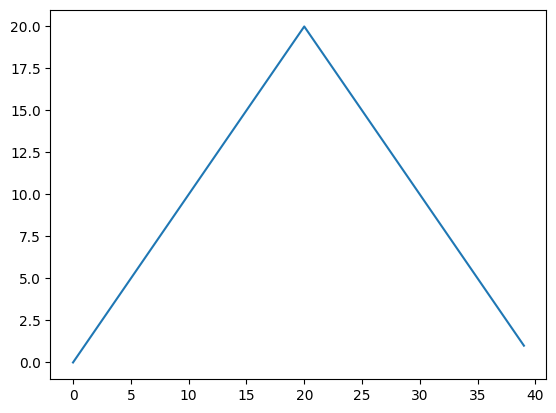

In [ ]:
max_plot = matplotlib.pyplot.plot(numpy.amax(data, axis=0))
matplotlib.pyplot.show()

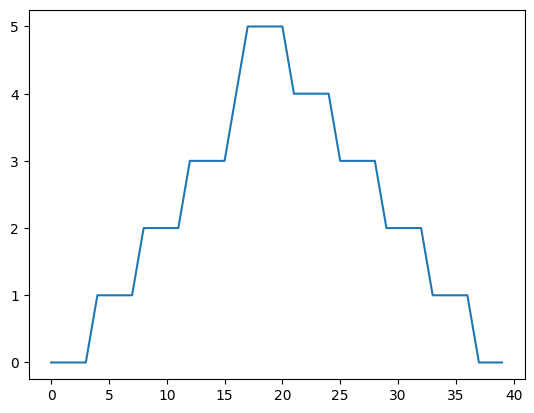

In [ ]:
min_plot = matplotlib.pyplot.plot(numpy.amin(data, axis=0))
matplotlib.pyplot.show()

The maximum value rises and falls linearly, while the minimum seems to be a step function. Neither trend seems particularly likely, so either there’s a mistake in our calculations or something is wrong with our data. This insight would have been difficult to reach by examining the numbers themselves without visualization tools.

### Grouping plots

You can group similar plots in a single figure using subplots. This script below uses a number of new commands. The function `matplotlib.pyplot.figure() `creates a space into which we will place all of our plots. The parameter figsize tells Python how big to make this space. Each subplot is placed into the figure using its `add_subplot` method. The `add_subplot` method takes 3 parameters. The first denotes how many total rows of subplots there are, the second parameter refers to the total number of subplot columns, and the final parameter denotes which subplot your variable is referencing (left-to-right, top-to-bottom). Each subplot is stored in a different variable (`axes1`, `axes2`, `axes3`). Once a subplot is created, the axes can be titled using the `set_xlabel()` command (or `set_ylabel()`). Here are our three plots side by side:

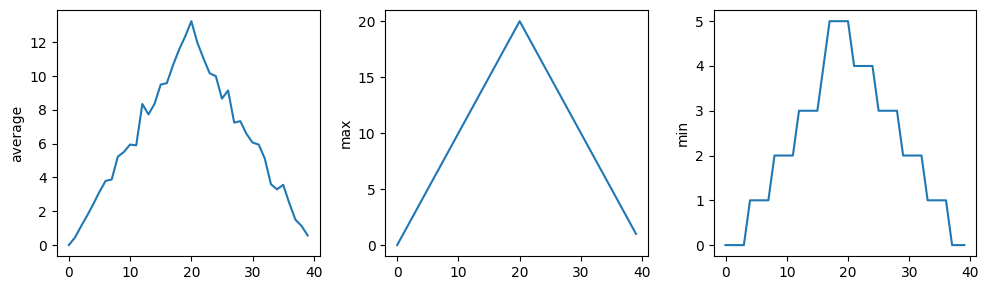

In [ ]:
import numpy
import matplotlib.pyplot

data = numpy.loadtxt(fname='inflammation-01.csv', delimiter=',')

fig = matplotlib.pyplot.figure(figsize=(10.0, 3.0))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(numpy.mean(data, axis=0))

axes2.set_ylabel('max')
axes2.plot(numpy.amax(data, axis=0))

axes3.set_ylabel('min')
axes3.plot(numpy.amin(data, axis=0))

fig.tight_layout()

matplotlib.pyplot.savefig('inflammation.png') #check over to see where it saved
matplotlib.pyplot.show()

The call to `loadtxt` reads our data, and the rest of the program tells the plotting library how large we want the figure to be, that we’re creating three subplots, what to draw for each one, and that we want a tight layout. (If we leave out that call to fig.`tight_layout()`, the graphs will actually be squeezed together more closely.)

The call to `savefig` stores the plot as a graphics file. This can be a convenient way to store your plots for use in other documents, web pages etc. The graphics format is automatically determined by Matplotlib from the file name ending we specify; here PNG from ‘inflammation.png’. Matplotlib supports many different graphics formats, including SVG, PDF, and JPEG.


Why do all of our plots stop just short of the upper end of our graph?

If we want to change this, we can use the set_ylim(min, max) method of each ‘axes’, for example:

`axes3.set_ylim(0, 6)`

Update your plotting code to automatically set a more appropriate scale. (Hint: you can make use of the max and min methods to help.)



---



### Importing libraries with shortcuts

In this lesson we use the import `matplotlib.pyplot` syntax to import the `pyplot` module of `matplotlib`. However, shortcuts such as import `matplotlib.pyplot` as `plt` are frequently used. Importing `pyplot` this way means that after the initial import, rather than writing matplotlib.`pyplot.plot(...)`, you can now write `plt.plot(...)`. Another common convention is to use the shortcut `import numpy as np` when importing the NumPy library. We then can write `np.loadtxt(...)` instead of `numpy.loadtxt(...)`, for example.

Some people prefer these shortcuts as it is quicker to type and results in shorter lines of code - especially for libraries with long names! You will frequently see Python code online using a `pyplot` function with `plt`, or a NumPy function with `np`, and it’s because they’ve used this shortcut. It makes no difference which approach you choose to take, but you must be consistent as if you use `import matplotlib.pyplot as plt` then `matplotlib.pyplot.plot(...)` will not work, and you must use `plt.plot(...)` instead. Because of this, when working with other people it is important you agree on how libraries are imported.



---



### Try it!

Create a plot showing the standard deviation (numpy.std) of the inflammation data for each day across all patients.

In [ ]:
### Code it up!

Ok... Now modify the program to display the three plots on top of one another instead of side by side.

In [ ]:
### Go for it!

Ok, now let's try to repeat that process, but with inflammation-02.csv and inflammation-03.csv.  What difference do you notice??

In [ ]:
### Code it up!

### Key points:
- Use the `pyplot` module from the `matplotlib` library for creating simple visualizations.